#### Importando o dataset

In [617]:
import pandas as pd
import numpy as np

In [618]:
df_train = pd.read_csv("/content/drive/MyDrive/titanic_data/train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/titanic_data/test.csv")

In [619]:
df_train.shape

(891, 12)

In [620]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [621]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [622]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [623]:
df_test.shape

(418, 11)

In [624]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


#### Substituindo valores NaN em features relevantes

- Age e embarked vão ser preenchido com a média dos valores

- A coluna Name, Cabin e ticket serão apagadas pois os valores são pouco relevantes

In [625]:
mean_age = df_train['Age'].mean()
df_train['Age'].fillna(value=mean_age, inplace=True)

mean_embarked = df_train['Embarked'].mode().values[0]
df_train['Embarked'].fillna(value=mean_embarked, inplace=True)

df_train.drop(columns=['Cabin','Name','Ticket'], inplace=True)

In [626]:
df_test.drop(columns=['Cabin','Name','Ticket'], inplace=True)

In [627]:
df_test.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [628]:
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [629]:
df_test.shape

(418, 8)

In [630]:
df_test = df_test.dropna()

In [631]:
df_test.shape

(331, 8)

In [632]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


Convertendo a coluna 'sex' para binário

In [633]:
df_train['Sex'] = df_train['Sex'].apply({'male':1,'female':0}.get)
df_test['Sex'] = df_test['Sex'].apply({'male':1,'female':0}.get)

<ipython-input-633-951977d24b8c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Sex'] = df_test['Sex'].apply({'male':1,'female':0}.get)


In [634]:
df_test.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [635]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,S
1,2,1,1,0,38.0,1,0,71.2833,C
2,3,1,3,0,26.0,0,0,7.9250,S
3,4,1,1,0,35.0,1,0,53.1000,S
4,5,0,3,1,35.0,0,0,8.0500,S


Convertendo a coluna 'embarked' para valores numéricos

In [636]:
df_train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [637]:

embarked_map = {'S': 0, 'C': 1, 'Q':2}
df_train['Embarked']  = df_train['Embarked'].map(embarked_map)
df_test['Embarked']  = df_test['Embarked'].map(embarked_map)


<ipython-input-637-f8828e8e8e4f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Embarked']  = df_test['Embarked'].map(embarked_map)


In [638]:
df_train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,0.361392
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.635673
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


Separando a coluna de rótulos

In [639]:
train_data = df_train.drop(columns=['Survived','PassengerId'])
train_labels = df_train['Survived']
df_test = df_test.drop(columns=['PassengerId'])

In [640]:
train_data.shape

(891, 7)

In [641]:
train_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,0
1,1,0,38.0,1,0,71.2833,1
2,3,0,26.0,0,0,7.9250,0
3,1,0,35.0,1,0,53.1000,0
4,3,1,35.0,0,0,8.0500,0


In [642]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,2
1,3,0,47.0,1,0,7.0000,0
2,2,1,62.0,0,0,9.6875,2
3,3,1,27.0,0,0,8.6625,0
4,3,0,22.0,1,1,12.2875,0


In [643]:
from sklearn.preprocessing import MinMaxScaler


In [644]:
scaler = MinMaxScaler()
scaler.fit(train_data)
train_data = scaler.transform(train_data)
scaler = MinMaxScaler()
scaler.fit(df_test)
df_test = scaler.transform(df_test)

In [645]:
#redes neurais
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

# Plot
import matplotlib.pyplot as plt

In [646]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(train_data, train_labels, test_size = 0.1, random_state=9, stratify=train_labels)
print('Qtde de treino: {}'.format(len(x_train)))
print('Qtde de validação: {}'.format(len(x_val)))

Qtde de treino: 801
Qtde de validação: 90


In [647]:
x_train.shape

(801, 7)

#### MLP com 1 camada oculta e 16 neurônios

In [648]:
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=3)

# Build the model.
model1 = Sequential()
model1.add(Dense(16, activation='relu', input_shape=(x_train.shape[1],)))
model1.add(Dense(16, activation='relu'))
model1.add(Dense(2,  activation="softmax"))
    
model1.compile(optimizer="rmsprop",
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"], 
            )
history1 = model1.fit(x_train,y_train,validation_split=0.1, callbacks=[callback])
test_loss1,test_acc1 = model1.evaluate(x_val,y_val)


3/3 [==============================] - 0s 4ms/step - loss: 0.6089 - accuracy: 0.7667


In [649]:
# Build the model.
model2 = Sequential()
model2.add(Dense(16, activation='relu', input_shape=(x_train.shape[1],)))
model2.add(Dense(16, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(2,  activation="softmax"))
    
model2.compile(optimizer="rmsprop",
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"], 
            )
history2 = model2.fit(x_train,y_train,validation_split=0.1, callbacks=[callback])
test_loss2,test_acc2 = model2.evaluate(x_val,y_val)

3/3 [==============================] - 0s 4ms/step - loss: 0.6393 - accuracy: 0.7667


In [650]:
# Build the model.
model3 = Sequential()
model3.add(Dense(16, activation='relu', input_shape=(x_train.shape[1],)))
model3.add(Dense(16, activation='relu'))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(2,  activation="softmax"))
    
model3.compile(optimizer="rmsprop",
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"], 
            )
history3 = model3.fit(x_train,y_train,validation_split=0.1, callbacks=[callback])
test_loss3,test_acc3 = model3.evaluate(x_val,y_val)

3/3 [==============================] - 0s 4ms/step - loss: 0.5388 - accuracy: 0.7556


In [651]:
import matplotlib.pyplot as plt

In [652]:
history1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

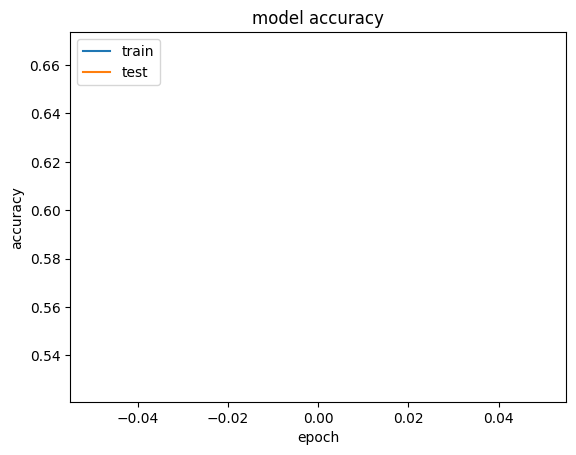

In [653]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

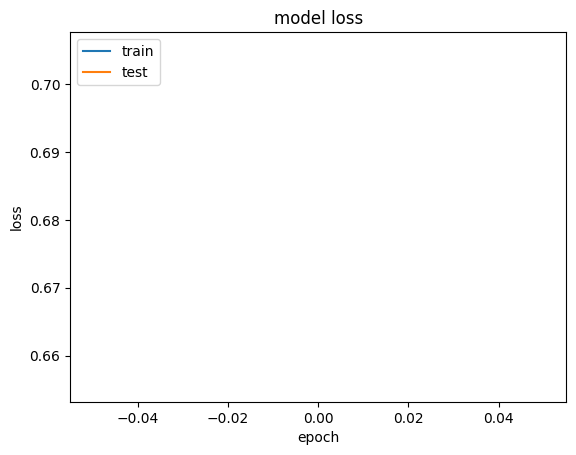

In [654]:
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

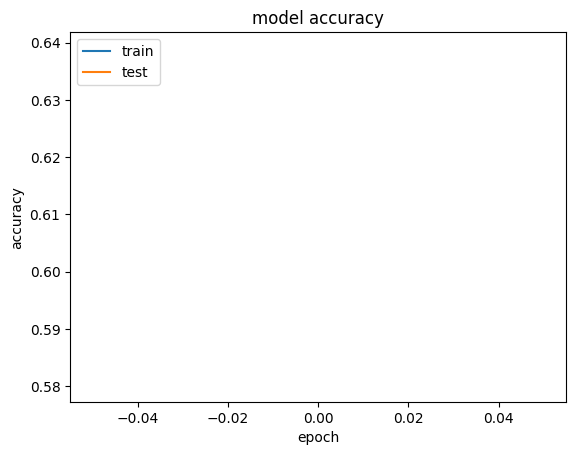

In [655]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

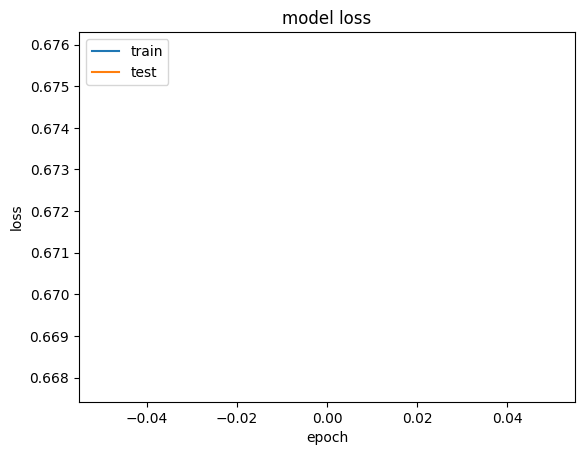

In [656]:
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

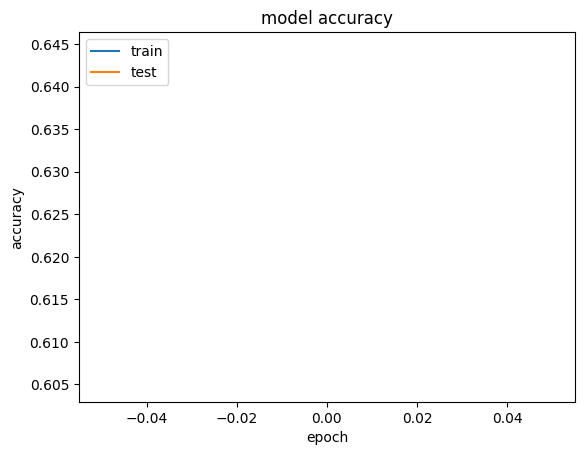

In [657]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

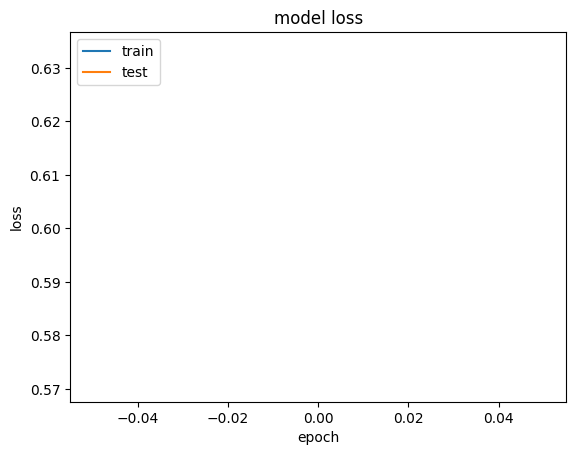

In [658]:
# summarize history for loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [659]:
y_predict = model1.predict(df_test)

11/11 [==============================] - 0s 2ms/step


In [660]:
y_predict

array([[0.54719555, 0.45280445],
       [0.49467096, 0.5053291 ],
       [0.4702752 , 0.52972484],
       [0.58221185, 0.41778815],
       [0.5311878 , 0.46881226],
       [0.6031809 , 0.39681906],
       [0.40902263, 0.5909775 ],
       [0.58605593, 0.413944  ],
       [0.475332  , 0.52466804],
       [0.5996893 , 0.40031075],
       [0.57337886, 0.42662102],
       [0.51153547, 0.48846453],
       [0.5641802 , 0.4358198 ],
       [0.50021404, 0.49978602],
       [0.4657112 , 0.5342887 ],
       [0.5272865 , 0.47271347],
       [0.5889606 , 0.4110394 ],
       [0.50320685, 0.49679312],
       [0.44091335, 0.55908656],
       [0.53476375, 0.46523622],
       [0.6194521 , 0.38054782],
       [0.5452224 , 0.45477754],
       [0.43796578, 0.5620342 ],
       [0.5642126 , 0.43578735],
       [0.46111798, 0.53888196],
       [0.5865786 , 0.41342133],
       [0.56544083, 0.4345591 ],
       [0.5579256 , 0.44207442],
       [0.56721   , 0.43278998],
       [0.53884363, 0.4611564 ],
       [0.

In [661]:
y_pred = []
for prob in y_predict:
  classe = np.argmax(prob)
  y_pred.append(classe)

In [662]:
y_pred

[0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
